In [ ]:
# import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.preprocessing as sk_preprocessing
import sklearn.model_selection as sk_modelselect

In [ ]:
# load dataset
dataset = pd.DataFrame(pd.read_csv("dataset_1.csv", header=0))
display(dataset.head(10))

print(dataset.shape)

,Age,Mortality female,Mortality male,sex ratio,Total Eggs,Egg Weight,Feed female,Feed male,Hatching Eggs,total hatched eggs
0,26.0,5,2,10.290,6850,53.2,133.0,130,6405,3343.410
1,26.1,2,2,10.300,7630,53.4,133.0,130,7145,3729.690
2,26.2,2,1,10.312,8130,53.5,136.0,130,7630,3982.860
3,26.3,3,-,10.318,8540,53.6,136.0,130,7990,4170.780
4,26.4,2,-,10.316,9560,53.7,136.0,130,8915,4653.630
5,26.5,3,-,10.315,9490,53.8,140.0,130,8880,4635.360
6,26.6,3,1,10.313,9780,54.0,140.0,130,9180,4791.960
7,27.0,2,2,10.317,10450,54.1,140.0,130,9826,6317.135
8,27.1,2,2,10.329,10800,54.3,144.0,130,10110,6499.719
9,27.2,5,2,10.342,10860,54.5,144.0,130,10170,6538.293


(302, 10)


In [ ]:
# check for missing data
print(dataset.isna().sum())

Age                   0
Mortality female      0
Mortality male        0
sex ratio             0
Total Eggs            0
Egg Weight            0
Feed female           0
Feed male             0
Hatching Eggs         0
total hatched eggs    0
dtype: int64


In [ ]:
# Get columns with object or categorical dtype
categorical_cols = dataset.columns[(dataset.dtypes==object) | (dataset.dtypes==bool)].tolist()

print(categorical_cols)

['Mortality female', 'Mortality male']


In [ ]:
# Loop through each categorical column and print what are the categoris they have (only done for test dataset)
for col in categorical_cols:
    categories = dataset[col].unique()
    print(f"{col}: {categories}")

Mortality female: ['5' '2' '3' '4' '6' '58' '67' '32' '8' '11' '17' '12' '10' '.' '7']
Mortality male: ['2' '1' '-' '75' '3' '4' '0']


In [ ]:
dataset.replace('-', 0, inplace=True)
dataset.replace('.', 0, inplace=True)
display(dataset.head())

,Age,Mortality female,Mortality male,sex ratio,Total Eggs,Egg Weight,Feed female,Feed male,Hatching Eggs,total hatched eggs
0,26.0,5,2,10.290,6850,53.2,133.0,130,6405,3343.41
1,26.1,2,2,10.300,7630,53.4,133.0,130,7145,3729.69
2,26.2,2,1,10.312,8130,53.5,136.0,130,7630,3982.86
3,26.3,3,0,10.318,8540,53.6,136.0,130,7990,4170.78
4,26.4,2,0,10.316,9560,53.7,136.0,130,8915,4653.63


In [ ]:
# file_path = '/home/new_dataset2.csv'

# # Use the to_csv() method to save the DataFrame as a CSV file
# dataset.to_csv(file_path, index=False)

In [ ]:
# x_data = dataset.drop(columns=['total hatched eggs', 'Hatching Eggs', 'Feed female', 'Feed male'])
x_data = dataset[['Age', 'sex ratio']]
y_data = dataset['total hatched eggs']
# x_data.reshape(-1, 1)


# Split the data into training and testing sets (20% testing and 80% training)
X_train, X_test, y_train, y_test = sk_modelselect.train_test_split(x_data, y_data, test_size=0.10, random_state=42)

display(X_train.head());
display(y_train.head());


,Age,sex ratio
283,66.3,11.726
198,54.2,11.022
42,32.0,10.334
17,28.3,10.371
168,50.0,10.884


283     5289.000
198     7704.300
42     10929.569
17      8946.000
168     8440.000
Name: total hatched eggs, dtype: float64

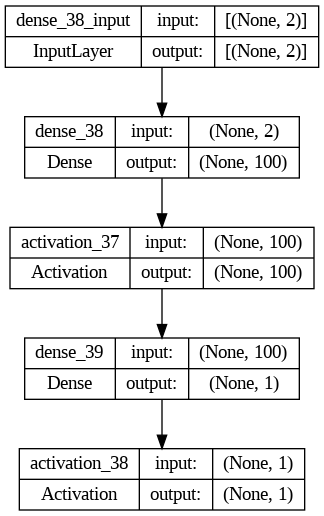

In [65]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import tensorflow as tf
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Dense(100, input_shape=(X_train.shape[1],) ))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('relu'))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [64]:
hist = model.fit(X_train, y_train,batch_size=50, epochs=5)

Epoch 1/50
6/6 [==============================] - 1s 3ms/step - loss: 71155096.0000 - accuracy: 0.0000e+00
Epoch 2/50
6/6 [==============================] - 0s 3ms/step - loss: 71155096.0000 - accuracy: 0.0000e+00
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 71155096.0000 - accuracy: 0.0000e+00
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 71155096.0000 - accuracy: 0.0000e+00
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 71155096.0000 - accuracy: 0.0000e+00
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 71155096.0000 - accuracy: 0.0000e+00
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 71155096.0000 - accuracy: 0.0000e+00
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 71155096.0000 - accuracy: 0.0000e+00
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 71155096.0000 - accuracy: 0.0000e+00
Epoch 10/50
6/6 [====================

In [66]:
loss, acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', acc)

1/1 [==============================] - 0s 250ms/step - loss: 67879616.0000 - accuracy: 0.0000e+00
Test loss: 67879616.0
Test accuracy: 0.0
